In [274]:
import numpy as np
import torch
import Bio.PDB as PDB
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.neighbors import KernelDensity
from scipy import integrate

In [208]:

# download pdb from server and return the pdb structure.
def download_pdb(pdbid):
    pdb1 = PDB.PDBList()
    pdbParser = PDB.PDBParser()
    #with pdb1.retrieve_pdb_file(pdbid) as pdbname:
    pdbname = pdb1.retrieve_pdb_file(pdbid,file_format="pdb")
    structure = pdbParser.get_structure(pdbid,pdbname)
    return structure
    

#def find_low_quality(pdbstruct):
    


    
    


Structure exists: 'd:\files\UCPH\block2\structrual bioinformatics\final\dn\pdb2dn1.ent' 


d:\app\anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4784.
  warnings.warn(
d:\app\anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4902.
  warnings.warn(
d:\app\anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4992.
  warnings.warn(
d:\app\anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5268.
  warnings.warn(


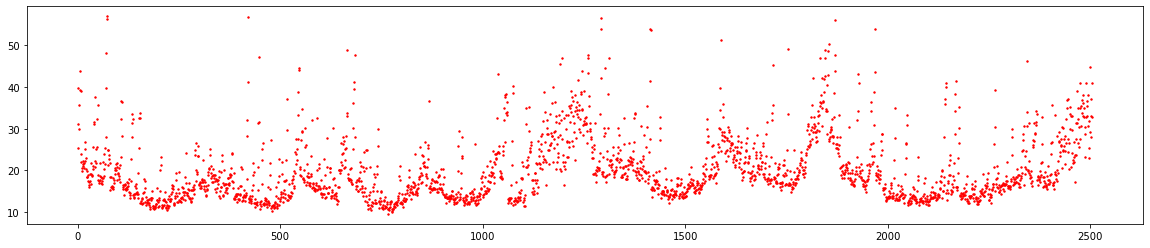

In [370]:
pdbparser = PDB.PDBParser()

pdb1 = download_pdb("2DN1")
#structure = PDB.PDBParser().get_structure("2DN1",pdb1)
#pdb1_structure = pdbparser.get_structure("2DN1", pdb1)
# todo: first we build PP from the structure
# todo: calculate R factor of each pp
#todo: threshold output



atoms = pdb1.get_atoms()
clusterlist = []
position = 0
for atom in atoms:
    b_factor = atom.get_bfactor()
    clusterlist.append([position,b_factor])
    position = position+1

clusterlist = torch.tensor(clusterlist)
fig,ax = plt.subplots()
fig.set_figwidth(20)
ax.scatter(clusterlist[:,0],clusterlist[:,1],s = 2,color = "red")
pp_len = len(clusterlist[:,0])




9.740708294848591


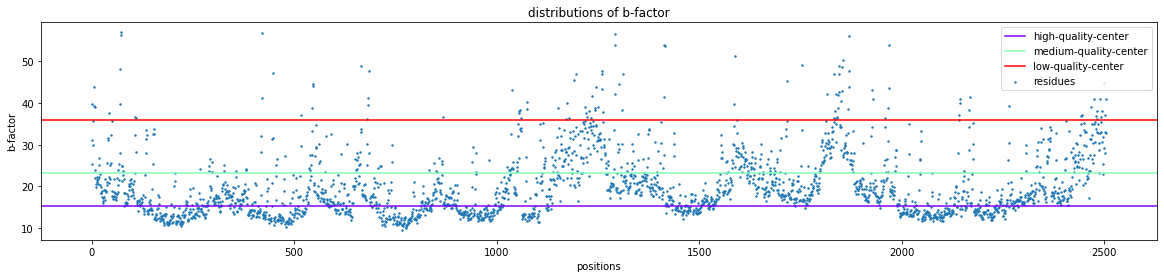

In [372]:
kmeans = KMeans(n_clusters=3)
scores = clusterlist[:,1].reshape(-1,1)
kmeans.fit(scores)
#print(kmeans.cluster_centers_)
cluster_centers = kmeans.cluster_centers_
cluster_centers.sort(axis=0)

fig, ax = plt.subplots()
fig.set_figwidth(20)
xs = np.linspace(0,len(clusterlist[:,0]),len(clusterlist[:,0]))
color = iter(plt.cm.rainbow(np.linspace(0, 1, 3)))
for i in range(cluster_centers.shape[0]):
    #ys = np.tile(cluster_centers[i],(1,len(clusterlist[:,0])))
    c = next(color)
    if i==2:

        ax.axhline(cluster_centers[i],0,len(clusterlist[:,0]),label="low-quality-center",color=c)
        ax.set_label(i)
    if i==1:

        ax.axhline(cluster_centers[i],0,len(clusterlist[:,0]),label="medium-quality-center",color=c)
        ax.set_label(i)
    if i==0:

        ax.axhline(cluster_centers[i],0,len(clusterlist[:,0]),label="high-quality-center",color=c)
        ax.set_label(i)

dots = ax.scatter(clusterlist[:,0],clusterlist[:,1],s = 2,label="residues")
ax.set_title("distributions of b-factor")
ax.set_xlabel("positions")
ax.set_ylabel("b-factor")
ax.legend()

print(kmeans.inertia_/pp_len)


In [373]:
for atom in atoms:
    b_factor = atom.get_bfactor()
    


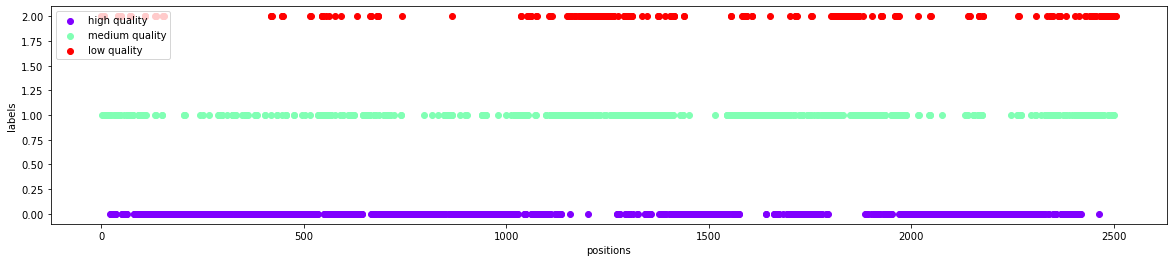

In [374]:
labels = []
labels = kmeans.predict(scores)

labels = np.vstack((labels,clusterlist[:,0]))

color = iter(plt.cm.rainbow(np.linspace(0, 1, 3)))

fig, ax = plt.subplots()
fig.set_figwidth(20)
for i in range(3):
    c = next(color)
    poscur = np.argwhere(labels[0,:]==i)
    if i==2:

        ax.scatter(poscur,labels[0,poscur],color=c,label="low quality")
        ax.set_label(i)
    if i==1:

        ax.scatter(poscur,labels[0,poscur],color=c, label="medium quality")
        ax.set_label(i)
    if i==0:

        ax.scatter(poscur,labels[0,poscur],color=c, label ="high quality")
        ax.set_label(i)

ax.set_xlabel("positions")
ax.set_ylabel("labels")
ax.legend()

In [353]:
## draw the histgram of each quality values
low_pos = np.argwhere(labels[0,:]==2)
low_atoms = np.hstack((low_pos,labels[0,low_pos]))

mid_pos = np.argwhere(labels[0,:]==1)
mid_atoms = np.hstack((mid_pos,labels[0,mid_pos]))
high_pos = np.argwhere(labels[0,:]==0)
high_atoms = np.hstack((high_pos,labels[0,high_pos]))

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)


low_region =consecutive(low_pos.flatten())
atom_list = []
atoms = pdb1.get_atoms()
for atom in atoms:
    atom_list.append(atom.get_name())
#print(atom_list)
new_lowregion =[]
# for i in low_region:
#     if i.size >=3:
#         new_lowregion.append(i)
region_list =[] 
for i in low_region:
    if i.size >=3:
        new_lowregion.append(i)
    for index_list in new_lowregion:
        local_list = []
        for i in index_list:
                    
            local_list.append(atom_list[i])
        region_list.append(local_list)
print(region_list)


[['CB', 'CG', 'CD1', 'CD2'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CD', 'OE1', 'OE2'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CD', 'OE1', 'OE2'], ['CD', 'CE', 'NZ'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CD', 'OE1', 'OE2'], ['CD', 'CE', 'NZ'], ['CD', 'CE', 'NZ'], ['CB', 'CG', 'CD1', 'CD2'], ['CD', 'CE', 'NZ'], ['CG', 'CD', 'CE', 'NZ'], ['CG', 'CD', 'CE'], ['CD', 'OE1', 'OE

Text(-5, 0.002, 'hist-high')

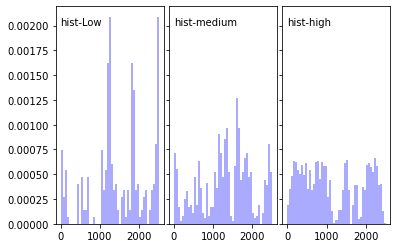

In [337]:


pp_len = len(clusterlist[:,0])
#print(pp_len)
bins = np.linspace(0, pp_len, 50)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

ax[0].hist(low_pos, bins=bins, fc="#AAAAFF", density=True)
ax[0].text(-5, 0.002, "hist-Low")

# histogram 2
ax[1].hist(mid_pos, bins=bins, fc="#AAAAFF", density=True)
ax[1].text(-5, 0.002, "hist-medium")

# histogram 3
ax[2].hist(high_pos, bins=bins, fc="#AAAAFF", density=True)
ax[2].text(-5, 0.002, "hist-high")
